In [28]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from utils.helpers import *
from utils.preprocessing import *
from impl.implementations import *
import datetime
from utils.plots import *
from utils.cross_validation import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
y_train, tx_train, ids_train = load_csv_data('data/train.csv')
y_train.shape = (-1, 1)
y_test, tx_test, ids_test = load_csv_data('data/test.csv')
y_test.shape = (-1, 1)

In [21]:
tx_train, tx_test = nan_to_mean(tx_train, tx_test)

In [49]:
lambdas = np.logspace(-9, -1, 10)
lambdas

array([1.00000000e-09, 7.74263683e-09, 5.99484250e-08, 4.64158883e-07,
       3.59381366e-06, 2.78255940e-05, 2.15443469e-04, 1.66810054e-03,
       1.29154967e-02, 1.00000000e-01])

In [52]:
lambda_, acc_tr, acc_te = cross_validation(tx_train, y_train, lambdas=lambdas, poly_degree=-1, n_splits=10, norm="std", method="logistic", max_iters=2000)

Start
NEW LAMBDA: 1e-09
Itteration: 0, Loss: 2.3848063626194107
Itteration: 300, Loss: 2.3663247178231406
Itteration: 600, Loss: 2.348016004527727
Itteration: 900, Loss: 2.3298795622374566
Itteration: 1200, Loss: 2.3119147036994536
Itteration: 1500, Loss: 2.2941207154511023
Itteration: 1800, Loss: 2.276496858053673
Itteration: 0, Loss: 1.8597904873856241
Itteration: 300, Loss: 1.844033325878427
Itteration: 600, Loss: 1.82857323332535
Itteration: 900, Loss: 1.8134059716981763
Itteration: 1200, Loss: 1.7985272193859716
Itteration: 1500, Loss: 1.7839325796167116
Itteration: 1800, Loss: 1.769617559668506
Itteration: 0, Loss: 1.6185213443774997
Itteration: 300, Loss: 1.5991075353435937
Itteration: 600, Loss: 1.5800341157567186
Itteration: 900, Loss: 1.5613016469096828
Itteration: 1200, Loss: 1.5429104738130417
Itteration: 1500, Loss: 1.5248607176565425
Itteration: 1800, Loss: 1.507152266025553
Itteration: 0, Loss: 2.284674013827243
Itteration: 300, Loss: 2.2584983867676907
Itteration: 600, 

KeyboardInterrupt: 

In [36]:
print(lambda_)
print(acc_tr)
print(acc_te)

1e-05
0.725916
0.7259199999999999


In [18]:
x_train_sep, y_train_sep, ids_train_sep, indx_train_sep = split_data_by_DER_mass_MMC(tx_train, y_train, ids_train)
x_test_sep, y_test_sep, ids_test_sep, indx_test_sep = split_data_by_DER_mass_MMC(tx_test, y_test, ids_test)

In [19]:
for i in range(8):
    x_train_sep[i], x_test_sep[i] = nan_to_mean(x_train_sep[i], x_test_sep[i])

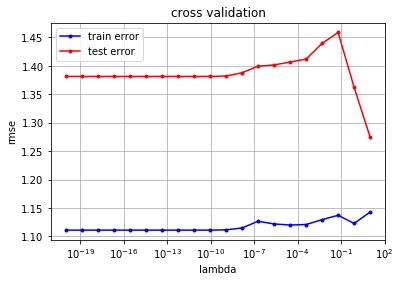

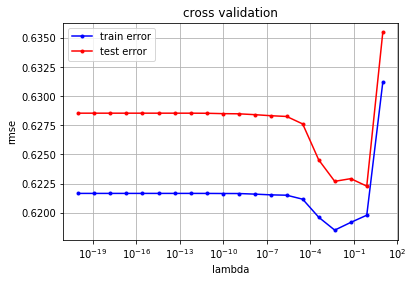

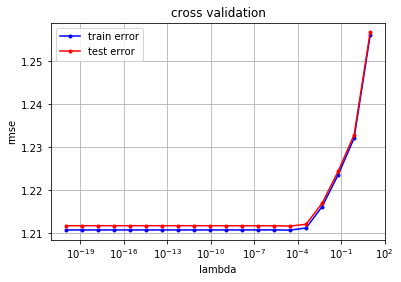

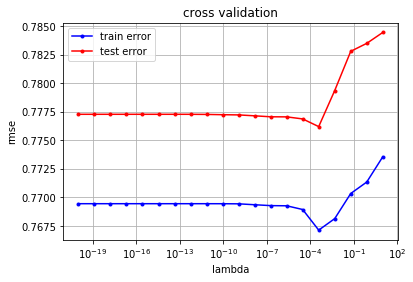

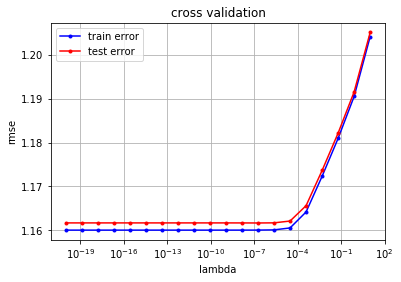

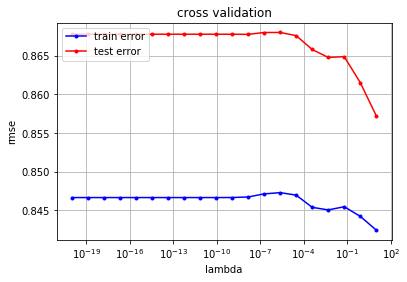

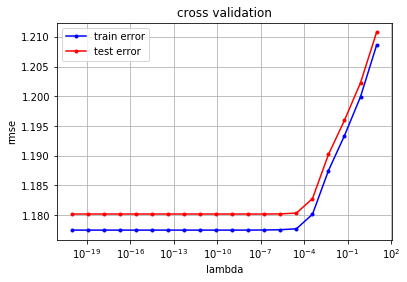

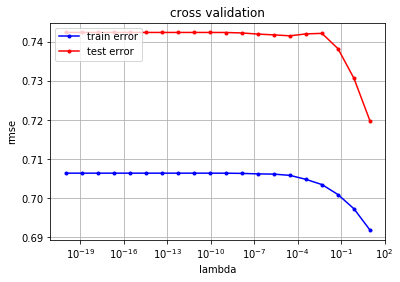

[10.0, 0.7847599703514623, 2.9763514416313253e-05, 0.00037926901907322694, 1.8329807108324375e-07, 10.0, 1.8329807108324375e-07, 10.0]
0.8514397098708073
[0.7774856574964991, 0.9460694231750895, 0.7561334984598774, 0.9159905937683716, 0.7948919818173298, 0.9010169491525423, 0.7851601117558563, 0.9347694633408918]
0.8493210670042666
[0.7770158558070199, 0.9459035222052069, 0.7552872249214062, 0.9148148148148149, 0.7939266132433571, 0.8979661016949153, 0.7831237911025145, 0.926530612244898]


In [4]:
number_of_models = 8

best_lambdas = []
acc_train = []
acc_test = []
for i in range(number_of_models):
    x_tr = x_train_sep[i]
    y_tr = y_train_sep[i]
    lambdas = np.logspace(-20, 1, 20)
    lambda_, acc_tr, acc_te = cross_validation(x_tr, y_tr, lambdas, poly_degree=3, norm=None)
    best_lambdas.append(lambda_)
    acc_train.append(acc_tr)
    acc_test.append(acc_te)
    
print(best_lambdas)
print(np.mean(acc_train))
print(acc_train)
print(np.mean(acc_test))
print(acc_test)

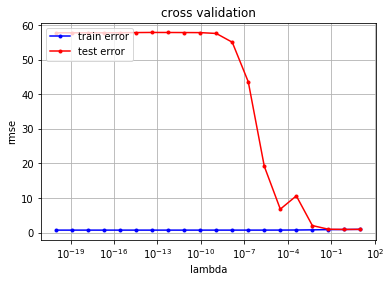

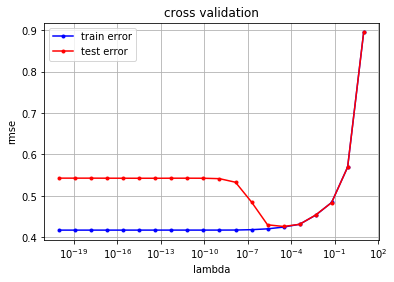

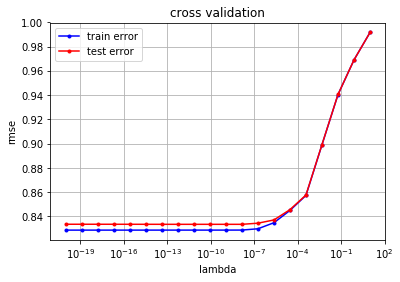

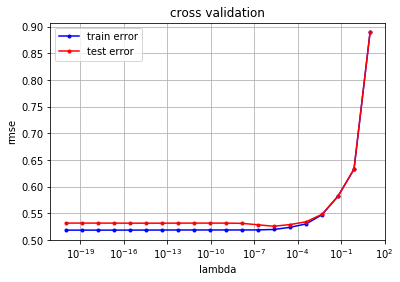

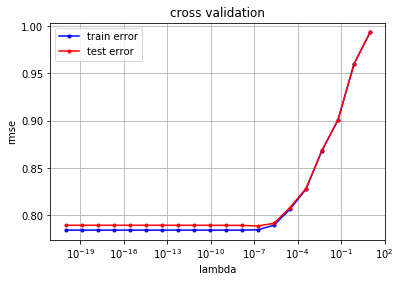

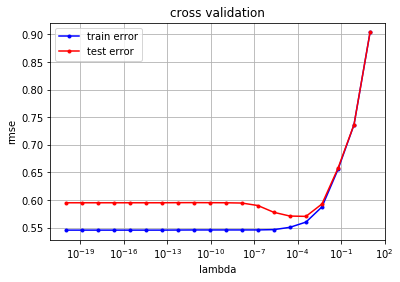

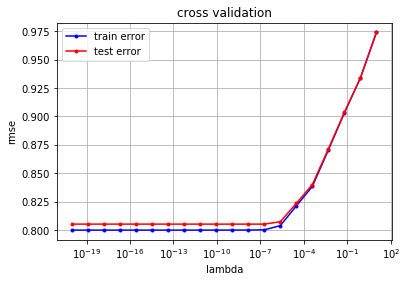

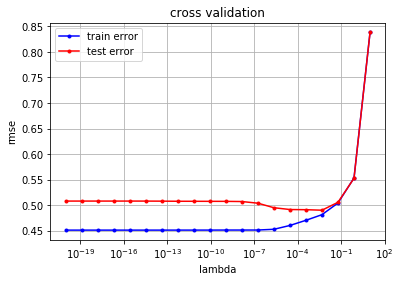

[0.7847599703514623, 2.9763514416313253e-05, 1.438449888287666e-08, 2.335721469090131e-06, 1.8329807108324375e-07, 0.00037926901907322694, 8.858667904100832e-11, 0.004832930238571772]
0.837741249691367
[0.67566065862583, 0.9446826612217116, 0.75641453113588, 0.9155496766607877, 0.7943085430432542, 0.8998116760828625, 0.7851923490221362, 0.9303099017384732]
0.8368455174632525
[0.67566065862583, 0.9446018376722819, 0.7556301800514433, 0.9149470899470898, 0.7934837621256854, 0.8972881355932204, 0.783220502901354, 0.9299319727891158]


In [21]:
number_of_models = 8

best_lambdas = []
acc_train = []
acc_test = []
for i in range(number_of_models):
    x_tr = x_train_sep[i]
    y_tr = y_train_sep[i]
    lambdas = np.logspace(-20, 1, 20)
    lambda_, acc_tr, acc_te = cross_validation(x_tr, y_tr, lambdas, poly_degree=3, norm="min_max")
    best_lambdas.append(lambda_)
    acc_train.append(acc_tr)
    acc_test.append(acc_te)
    
print(best_lambdas)
print(np.mean(acc_train))
print(acc_train)
print(np.mean(acc_test))
print(acc_test)

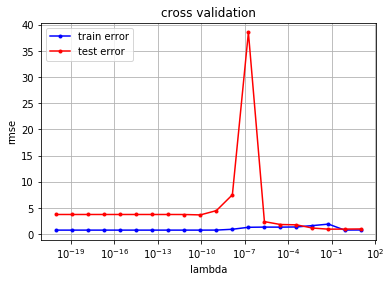

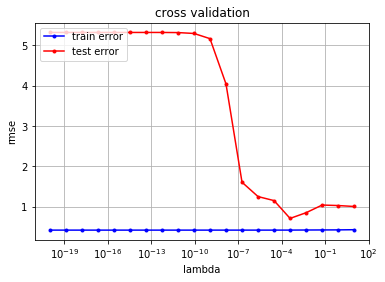

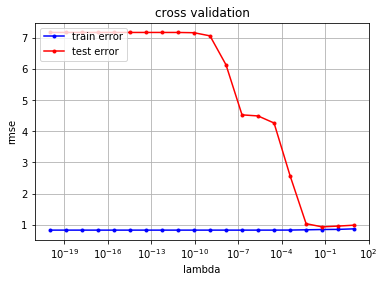

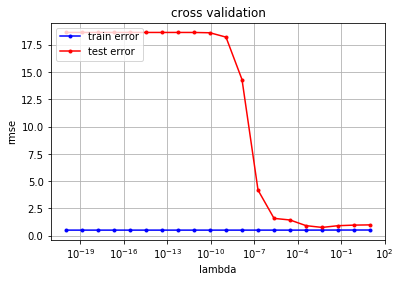

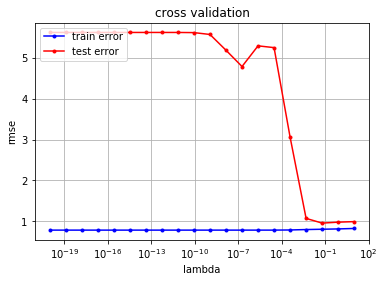

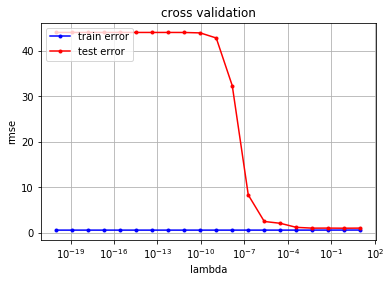

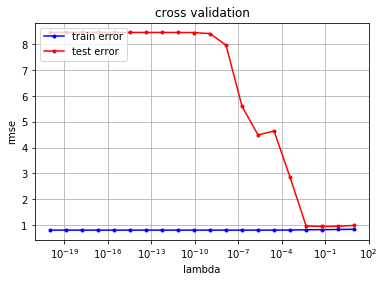

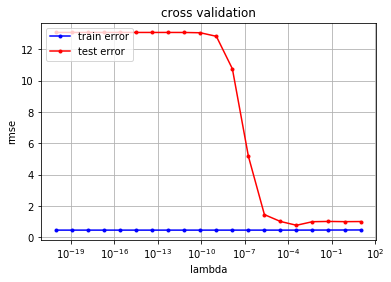

[0.061584821106602794, 0.00037926901907322694, 0.061584821106602794, 0.004832930238571772, 0.061584821106602794, 0.7847599703514623, 0.061584821106602794, 0.00037926901907322694]
0.8448303981509249
[0.7846094773456205, 0.9464650331801939, 0.7337413864278682, 0.9152851263962376, 0.7751792492619148, 0.9031261770244822, 0.763502041693531, 0.936734693877551]
0.7600431400360371
[0.6678682748339884, 0.9399310872894333, 0.6587453558159474, 0.9056878306878307, 0.6198228595529314, 0.7871186440677966, 0.6589941972920697, 0.8421768707482993]


In [22]:
number_of_models = 8

best_lambdas = []
acc_train = []
acc_test = []
for i in range(number_of_models):
    x_tr = x_train_sep[i]
    y_tr = y_train_sep[i]
    lambdas = np.logspace(-20, 1, 20)
    lambda_, acc_tr, acc_te = cross_validation(x_tr, y_tr, lambdas, poly_degree=3, norm="std")
    best_lambdas.append(lambda_)
    acc_train.append(acc_tr)
    acc_test.append(acc_te)
    
print(best_lambdas)
print(np.mean(acc_train))
print(acc_train)
print(np.mean(acc_test))
print(acc_test)

In [23]:
best_lambdas = [10.0, 0.7847599703514623, 2.9763514416313253e-05, 1.128837891684693e-09, 2.9763514416313253e-05, 0.00037926901907322694, 1.8329807108324375e-07, 10.0]

In [24]:
pred = train_and_get_predictions(x_train_sep, y_train_sep, x_test_sep, y_test_sep, indx_test_sep, best_lambdas)

[0.7632606044179429, 0.9401676683382459, 0.6732445485982109, 0.9100766992859032, 0.7181563244565332, 0.893970189701897, 0.7114613042007057, 0.9309410968178741]
0.8176598044771641


In [25]:
create_csv_submission(ids_test, pred, "output6.csv")

NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/matplotlib/axes/_base.py:3012: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


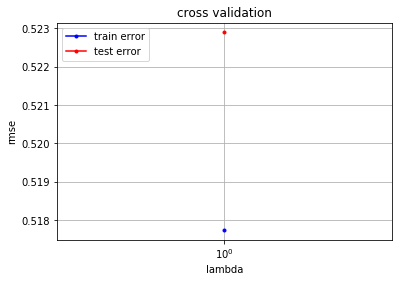

NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/matplotlib/axes/_base.py:3012: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


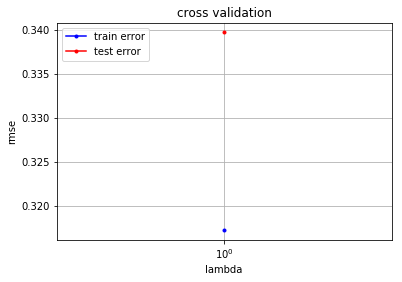

NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/matplotlib/axes/_base.py:3012: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


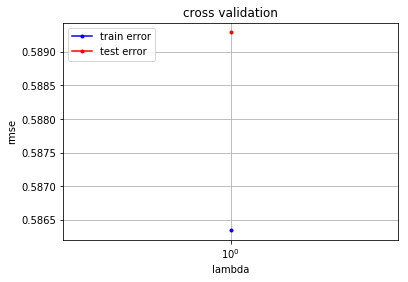

NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/matplotlib/axes/_base.py:3012: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


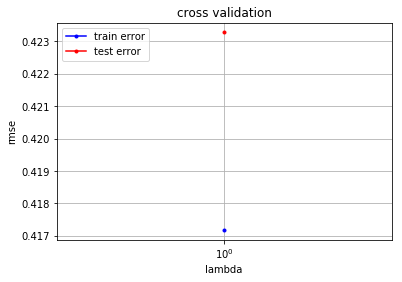

NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/matplotlib/axes/_base.py:3012: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


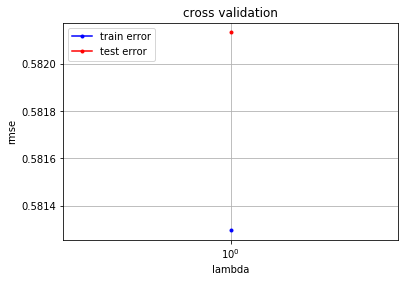

NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/matplotlib/axes/_base.py:3012: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


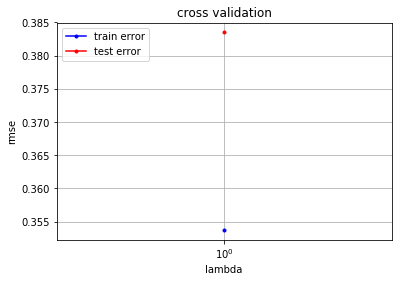

NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/matplotlib/axes/_base.py:3012: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


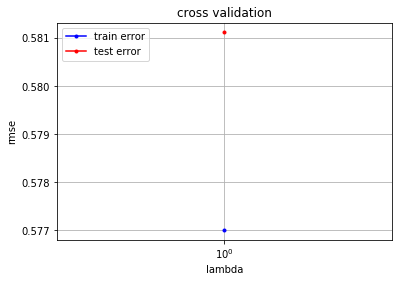

NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/matplotlib/axes/_base.py:3012: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


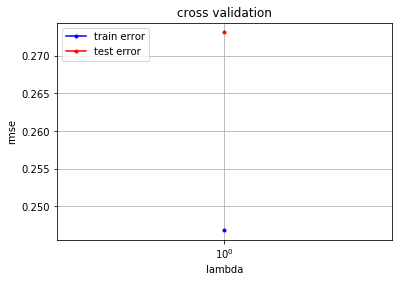

[1, 1, 1, 1, 1, 1, 1, 1]
0.8142390531531174
[0.774132297360377, 0.9433979921728772, 0.6779222635038583, 0.9085390946502058, 0.6893012793476732, 0.8811299435028248, 0.7063829787234043, 0.9331065759637187]
0.8132645574968234
[0.7731264398970049, 0.9430704441041348, 0.6777364961417548, 0.9092592592592592, 0.6889708983551245, 0.8783050847457627, 0.7036750483558994, 0.9319727891156464]


In [86]:
number_of_models = 8

best_lambdas = []
acc_train = []
acc_test = []
for i in range(number_of_models):
    x_tr = x_train_sep[i]
    y_tr = y_train_sep[i]

    #lambdas = np.logspace(-5, 1, 5)
    #lambdas = [0.0001, 0.001, 0.01, 0.1, 1]
    lambdas = [1]
    lambda_, acc_tr, acc_te = cross_validation(x_tr, y_tr, lambdas, poly_degree=3, norm=None, method="SKL")
    best_lambdas.append(lambda_)
    acc_train.append(acc_tr)
    acc_test.append(acc_te)
    
print(best_lambdas)
print(np.mean(acc_train))
print(acc_train)
print(np.mean(acc_test))
print(acc_test)

NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: Convergenc

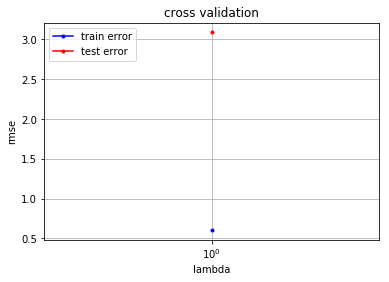

[0.6031444934344372]
[3.085100598092939]
NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432:

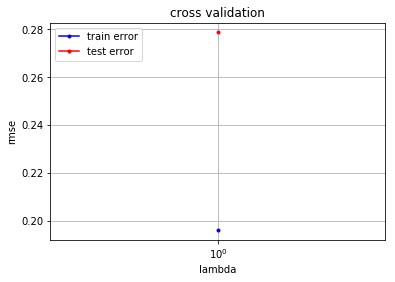

[0.19598990195443539]
[0.278637890869026]
NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: Convergenc

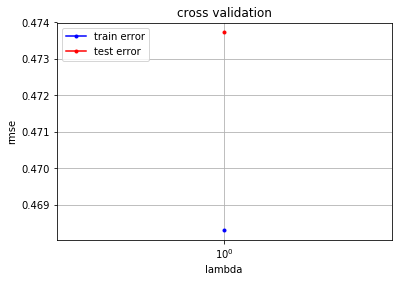

[0.4683009120686867]
[0.47372035183797206]
NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:

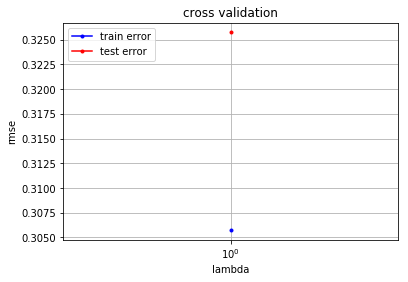

[0.30574205001431387]
[0.3257306553093199]
NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432:

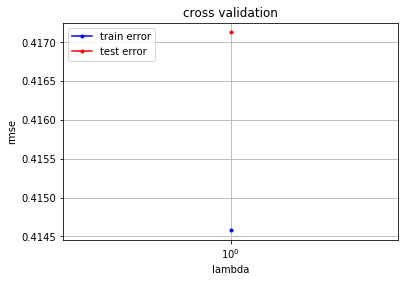

[0.4145809542930944]
[0.4171221053457215]
NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: Convergenc

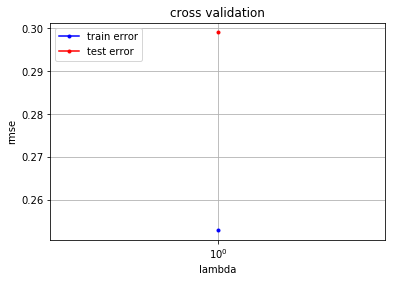

[0.2528674957698883]
[0.2990143031623246]
NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: Convergenc

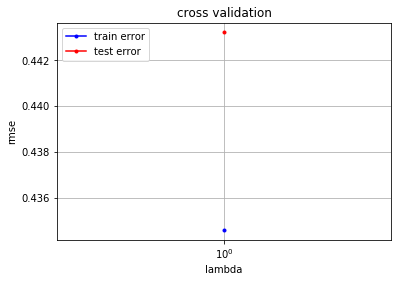

[0.4345794888078142]
[0.44320045394263674]
NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:

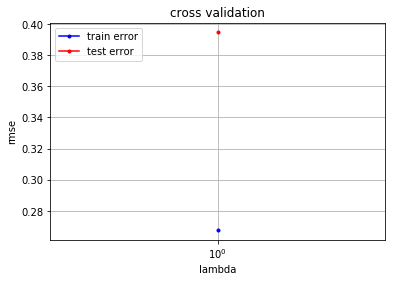

[0.2676634391418847]
[0.39455962655832183]
[1, 1, 1, 1, 1, 1, 1, 1]
0.8496804126496098
[0.7581515110448571, 0.9378764675855027, 0.785873741703979, 0.8803057025279248, 0.8190660293359577, 0.9055743879472693, 0.8127874489576616, 0.8978080120937264]
0.8427283745867784
[0.7570266973844695, 0.9370214395099541, 0.7849385538725351, 0.8744708994708995, 0.8183677773091522, 0.8898305084745763, 0.8107833655705996, 0.8693877551020408]


In [149]:
number_of_models = 8

best_lambdas = []
acc_train = []
acc_test = []
for i in range(number_of_models):
    x_tr = x_train_sep[i]
    y_tr = y_train_sep[i]

    #lambdas = np.logspace(-5, 1, 5)
    #lambdas = [0.0001, 0.001, 0.01, 0.1, 1]
    lambdas = [1]
    lambda_, acc_tr, acc_te = cross_validation(x_tr, y_tr, lambdas, poly_degree=3, norm="std", method="SKL")
    best_lambdas.append(lambda_)
    acc_train.append(acc_tr)
    acc_test.append(acc_te)
    
print(best_lambdas)
print(np.mean(acc_train))
print(acc_train)
print(np.mean(acc_test))
print(acc_test)

NEW LAMBDA: 1e-07
Itteration: 0, Loss: 7.620813914681056
Itteration: 300, Loss: 1.3506235256939967
Itteration: 600, Loss: 0.9693408625909237
Itteration: 900, Loss: 0.8246686624277985
Itteration: 1200, Loss: 0.8428302236331084
Itteration: 1500, Loss: 0.6947707623718862
Itteration: 1800, Loss: 0.6433902845032006
Itteration: 2100, Loss: 0.6790899730106562
Itteration: 2400, Loss: 0.6036834245906115
Itteration: 2700, Loss: 0.5807848923479793
Itteration: 0, Loss: 4.141093703715015
Itteration: 300, Loss: 1.4189169336431908
Itteration: 600, Loss: 0.9918161641370894
Itteration: 900, Loss: 0.8717360275859484
Itteration: 1200, Loss: 0.7941381821144898
Itteration: 1500, Loss: 0.7350220981026087
Itteration: 1800, Loss: 0.6880688540437465
Itteration: 2100, Loss: 0.6507971554959298
Itteration: 2400, Loss: 0.6208372586633036
Itteration: 2700, Loss: 0.5965729929176404
Itteration: 0, Loss: 83.08642823349903
Itteration: 300, Loss: 1.7076959651339845
Itteration: 600, Loss: 1.2122005741406965
Itteration: 9

/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/matplotlib/axes/_base.py:3012: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1e-07, right=1e-07
  self.set_xlim(upper, lower, auto=None)


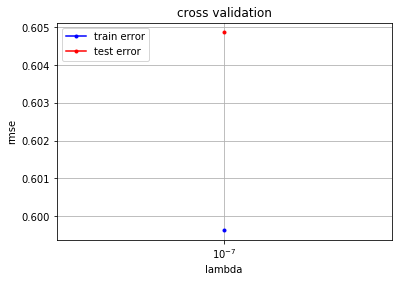

[0.5996327828003006]
[0.6048611364614352]
NEW LAMBDA: 1e-07
Itteration: 0, Loss: 12.840480160724214
Itteration: 300, Loss: 2.3681442959232832
Itteration: 600, Loss: 1.260924018069236
Itteration: 900, Loss: 0.8010331554615839
Itteration: 1200, Loss: 0.6333263238211546
Itteration: 1500, Loss: 0.554481937876491
Itteration: 1800, Loss: 0.4984687144629468
Itteration: 2100, Loss: 0.4546967356893505
Itteration: 2400, Loss: 0.4217528624201592
Itteration: 2700, Loss: 0.398407060593795
Itteration: 0, Loss: 16.74106275054792
Itteration: 300, Loss: 3.1517662328435736
Itteration: 600, Loss: 1.741868796443854
Itteration: 900, Loss: 1.0845834783626511
Itteration: 1200, Loss: 0.7992937207353117
Itteration: 1500, Loss: 0.6738809425664029
Itteration: 1800, Loss: 0.6053909583060655
Itteration: 2100, Loss: 0.5646407820092586
Itteration: 2400, Loss: 0.5384263971954344
Itteration: 2700, Loss: 0.5039863689547838
Itteration: 0, Loss: 8.78312011152607
Itteration: 300, Loss: 3.4532546662598045
Itteration: 600, 

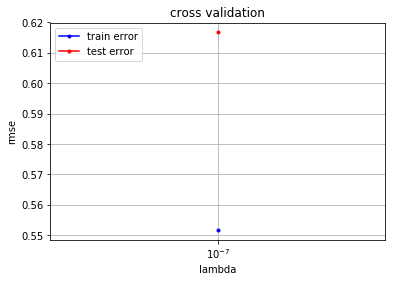

[0.5516195986745351]
[0.6166848260613044]
NEW LAMBDA: 1e-07
Itteration: 0, Loss: 6.296768986992765
Itteration: 300, Loss: 2.4112592350574467
Itteration: 600, Loss: 1.443151705972464
Itteration: 900, Loss: 1.1731898420599256
Itteration: 1200, Loss: 1.023462763518449
Itteration: 1500, Loss: 0.9288167875650885
Itteration: 1800, Loss: 0.860021955121554
Itteration: 2100, Loss: 0.8067109449258499
Itteration: 2400, Loss: 0.764379160703319
Itteration: 2700, Loss: 0.728757167797012
Itteration: 0, Loss: 12.596668182673252
Itteration: 300, Loss: 2.4911884528213974
Itteration: 600, Loss: 1.7063105057853154
Itteration: 900, Loss: 1.3016394394943736
Itteration: 1200, Loss: 1.076939668933832
Itteration: 1500, Loss: 0.9358049666064121
Itteration: 1800, Loss: 0.8347789621237973
Itteration: 2100, Loss: 0.7550364204105836
Itteration: 2400, Loss: 0.6941080274028611
Itteration: 2700, Loss: 0.6510835399104965
Itteration: 0, Loss: 15.676459660304626
Itteration: 300, Loss: 2.364057841038668
Itteration: 600, L

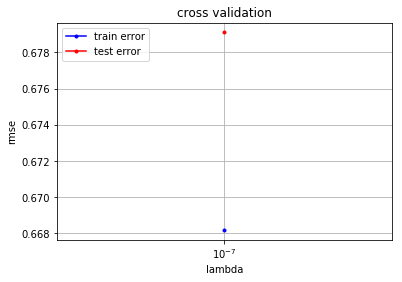

[0.6681695054387674]
[0.6791039060694926]
NEW LAMBDA: 1e-07
Itteration: 0, Loss: 11.76020190043604
Itteration: 300, Loss: 7.981446787880706
Itteration: 600, Loss: 5.997499077216952
Itteration: 900, Loss: 4.719997588472968
Itteration: 1200, Loss: 3.729379505646815
Itteration: 1500, Loss: 3.0308634841416273
Itteration: 1800, Loss: 2.4879213699805307
Itteration: 2100, Loss: 2.0703371933157495
Itteration: 2400, Loss: 1.7493067964288282
Itteration: 2700, Loss: 1.5011946650490366
Itteration: 0, Loss: 16.415339985202415
Itteration: 300, Loss: 11.18597508693661
Itteration: 600, Loss: 6.872048253866265
Itteration: 900, Loss: 5.122887117144246
Itteration: 1200, Loss: 4.418146558369611
Itteration: 1500, Loss: 3.8402505732956267
Itteration: 1800, Loss: 3.3394443174974806
Itteration: 2100, Loss: 2.8997425543407873
Itteration: 2400, Loss: 2.5112884920300544
Itteration: 2700, Loss: 2.167630806049446
Itteration: 0, Loss: 8.634836138029293
Itteration: 300, Loss: 6.012712557832621
Itteration: 600, Loss:

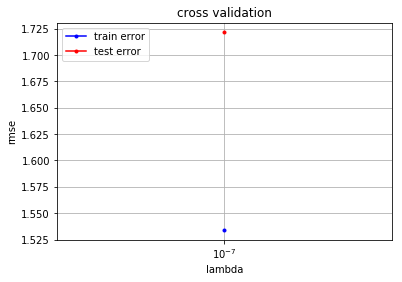

[1.53392960542091]
[1.7212822590825865]
NEW LAMBDA: 1e-07
Itteration: 0, Loss: 11.296510866646694
Itteration: 300, Loss: 3.810758297768113
Itteration: 600, Loss: 2.6789080579825324
Itteration: 900, Loss: 1.918781537070689
Itteration: 1200, Loss: 1.457690969306443
Itteration: 1500, Loss: 1.1858025682665871
Itteration: 1800, Loss: 1.021495870559962
Itteration: 2100, Loss: 0.9203638330365763
Itteration: 2400, Loss: 0.8517716631062334
Itteration: 2700, Loss: 0.7994154689730681
Itteration: 0, Loss: 10.846189251211932
Itteration: 300, Loss: 3.0643140278877166
Itteration: 600, Loss: 2.312079295807382
Itteration: 900, Loss: 1.880206393292484
Itteration: 1200, Loss: 1.5798532432868664
Itteration: 1500, Loss: 1.3601815870213618
Itteration: 1800, Loss: 1.1967330651098003
Itteration: 2100, Loss: 1.0727167322927984
Itteration: 2400, Loss: 0.975910551627607
Itteration: 2700, Loss: 0.8974196592759885
Itteration: 0, Loss: 9.684421190192005
Itteration: 300, Loss: 3.445303604902401
Itteration: 600, Loss

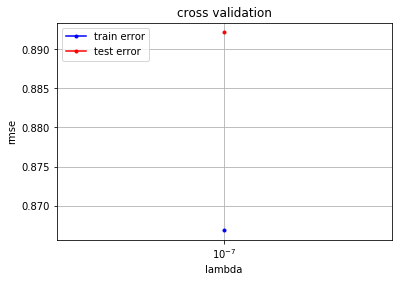

[0.8669068481245406]
[0.8921125233471097]
NEW LAMBDA: 1e-07
Itteration: 0, Loss: 12.763863397146999
Itteration: 300, Loss: 10.587550849153379
Itteration: 600, Loss: 8.746616263550273
Itteration: 900, Loss: 7.166505137873984
Itteration: 1200, Loss: 6.22163048394445
Itteration: 1500, Loss: 5.8520319945803125
Itteration: 1800, Loss: 5.495635368202199
Itteration: 2100, Loss: 5.157729137205569
Itteration: 2400, Loss: 4.839614870624535
Itteration: 2700, Loss: 4.550011854011097
Itteration: 0, Loss: 13.42797930527501
Itteration: 300, Loss: 10.89249045155795
Itteration: 600, Loss: 9.126377690160165
Itteration: 900, Loss: 7.625555875489161
Itteration: 1200, Loss: 6.4390911872416945
Itteration: 1500, Loss: 5.455538112156394
Itteration: 1800, Loss: 4.733585074540287
Itteration: 2100, Loss: 4.3041927830140905
Itteration: 2400, Loss: 3.9636300980094155
Itteration: 2700, Loss: 3.662894665907248
Itteration: 0, Loss: 12.149927181858297
Itteration: 300, Loss: 9.56785406299484
Itteration: 600, Loss: 8.12

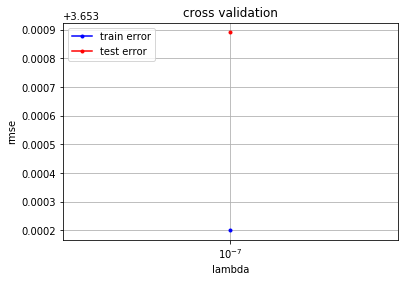

[3.653200134198832]
[3.6538908211924577]
NEW LAMBDA: 1e-07
Itteration: 0, Loss: 14.78660289433382
Itteration: 300, Loss: 5.009654959362256
Itteration: 600, Loss: 3.2677161016029848
Itteration: 900, Loss: 2.584321178957393
Itteration: 1200, Loss: 2.1584426075324803
Itteration: 1500, Loss: 1.8614614584277858
Itteration: 1800, Loss: 1.6453115714060231
Itteration: 2100, Loss: 1.4828065277552926
Itteration: 2400, Loss: 1.352332361388969
Itteration: 2700, Loss: 1.2432367891597835
Itteration: 0, Loss: 18.61877456881426
Itteration: 300, Loss: 8.966177916801229
Itteration: 600, Loss: 5.307143270282083
Itteration: 900, Loss: 4.393195489844066
Itteration: 1200, Loss: 3.811655445506743
Itteration: 1500, Loss: 3.416339096896219
Itteration: 1800, Loss: 3.1012516413375697
Itteration: 2100, Loss: 2.8253529775372597
Itteration: 2400, Loss: 2.584268313275798
Itteration: 2700, Loss: 2.3751238977790092
Itteration: 0, Loss: 25.35515534399374
Itteration: 300, Loss: 13.905629529490346
Itteration: 600, Loss: 

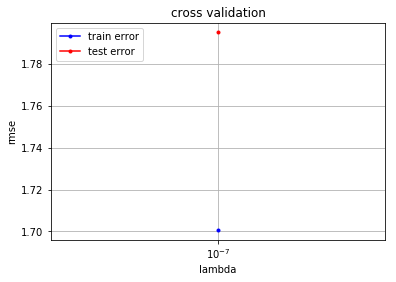

[1.70064336051438]
[1.7949804311132014]
NEW LAMBDA: 1e-07
Itteration: 0, Loss: 9.144449785610385
Itteration: 300, Loss: 7.25885095125071
Itteration: 600, Loss: 6.149145261773972
Itteration: 900, Loss: 5.820349533911733
Itteration: 1200, Loss: 5.494878337591879
Itteration: 1500, Loss: 5.173372033532897
Itteration: 1800, Loss: 4.857257099401082
Itteration: 2100, Loss: 4.5459144991925
Itteration: 2400, Loss: 4.239344006553324
Itteration: 2700, Loss: 3.9399301678217067
Itteration: 0, Loss: 11.182440560983467
Itteration: 300, Loss: 9.380008865887941
Itteration: 600, Loss: 7.672550993979728
Itteration: 900, Loss: 6.492207447836281
Itteration: 1200, Loss: 6.075733898692536
Itteration: 1500, Loss: 5.849195786321369
Itteration: 1800, Loss: 5.637087526054664
Itteration: 2100, Loss: 5.433546480919352
Itteration: 2400, Loss: 5.239476831498813
Itteration: 2700, Loss: 5.063614787657131
Itteration: 0, Loss: 16.130440742984117
Itteration: 300, Loss: 14.461568408990715
Itteration: 600, Loss: 12.9186372

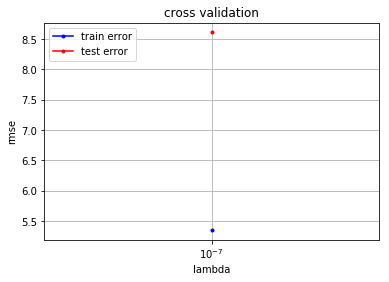

[5.3520612515375365]
[8.606033809417333]
[1e-07, 1e-07, 1e-07, 1e-07, 1e-07, 1e-07, 1e-07, 1e-07]
0.7311477737585714
[0.7607278914637636, 0.9247107367704613, 0.7235575243720429, 0.7677395649617871, 0.7085336707437087, 0.6611299435028248, 0.6428433268858801, 0.6599395313681028]
0.7308375532411614
[0.7596422279441659, 0.9238514548238899, 0.7232780794512718, 0.7633597883597883, 0.7086039645719107, 0.6593220338983052, 0.6412959381044488, 0.6673469387755102]


In [144]:
number_of_models = 8

best_lambdas = []
acc_train = []
acc_test = []
for i in range(number_of_models):
    x_tr = x_train_sep[i]
    y_tr = y_train_sep[i]

    #lambdas = np.logspace(-5, 1, 5)
    lambdas = [0.0000001]
    #lambdas = [1]
    lambda_, acc_tr, acc_te = cross_validation(x_tr, y_tr, lambdas, poly_degree=3, norm="std", method="logistic")
    best_lambdas.append(lambda_)
    acc_train.append(acc_tr)
    acc_test.append(acc_te)
    
print(best_lambdas)
print(np.mean(acc_train))
print(acc_train)
print(np.mean(acc_test))
print(acc_test)

In [14]:
number_of_models = 8

best_lambdas = []
acc_train = []
acc_test = []
for i in range(number_of_models):
    x_tr = x_train_sep[i]
    y_tr = y_train_sep[i]

    #lambdas = np.logspace(-5, 1, 5)
    lambdas = [0.00001, 0.000001, 0.0000001]
    #lambdas = [1]
    lambda_, acc_tr, acc_te = cross_validation(x_tr, y_tr, lambdas, poly_degree=3, n_splits=5, norm="std", method="logistic", max_iters=5000)
    best_lambdas.append(lambda_)
    acc_train.append(acc_tr)
    acc_test.append(acc_te)
    
print(best_lambdas)
print(np.mean(acc_train))
print(acc_train)
print(np.mean(acc_test))
print(acc_test)

Start
NEW LAMBDA: 1e-05
Itteration: 0, Loss: 18.122879571707422
Itteration: 300, Loss: 0.0006869231141779508
Itteration: 600, Loss: 7.938938635913214
Itteration: 900, Loss: 0.005234403361107618
Itteration: 1200, Loss: 0.002209722219258204
Itteration: 1500, Loss: 3.078871875412442
Itteration: 1800, Loss: 0.06089420305009279
Itteration: 2100, Loss: 0.8406258433502005
Itteration: 2400, Loss: 0.028257046032710256
Itteration: 2700, Loss: 4.243887169588896
Itteration: 3000, Loss: 2.1515531007284095e-65
Itteration: 3300, Loss: 2.7979843774328312
Itteration: 3600, Loss: 3.1655686230359072
Itteration: 3900, Loss: 1.5246126527296997e-06
Itteration: 4200, Loss: 0.00118102212492
Itteration: 4500, Loss: 0.00032903362614966625
Itteration: 4800, Loss: 151.25752745756196
Itteration: 0, Loss: 11.213303499347125
Itteration: 300, Loss: 17.417372712406287
Itteration: 600, Loss: 0.18810210923129442
Itteration: 900, Loss: 9.304384791210834e-12
Itteration: 1200, Loss: 7.334817410783276e-09
Itteration: 1500, 

KeyboardInterrupt: 

In [117]:
lambdas = [0.0000001]

NEW LAMBDA: 1e-07
Itteration: 0, Loss: 6.276158940184731
Itteration: 10, Loss: 6.139452051770993
Itteration: 20, Loss: 6.010208806806076
Itteration: 30, Loss: 5.88711212275015
Itteration: 40, Loss: 5.770566796586452
Itteration: 50, Loss: 5.658581334562691
Itteration: 60, Loss: 5.552044973279625
Itteration: 70, Loss: 5.447798873899142
Itteration: 80, Loss: 5.345594072969458
Itteration: 90, Loss: 5.246936824333731
Itteration: 100, Loss: 5.150195914845483
Itteration: 110, Loss: 5.0548765345825855
Itteration: 120, Loss: 4.961150277304188
Itteration: 130, Loss: 4.86913852895455
Itteration: 140, Loss: 4.779212109726871
Itteration: 150, Loss: 4.690741132506524
Itteration: 160, Loss: 4.6040961235398665
Itteration: 170, Loss: 4.521719705294604
Itteration: 180, Loss: 4.4403469763951
Itteration: 190, Loss: 4.361403842434037
Itteration: 200, Loss: 4.284268548195941
Itteration: 210, Loss: 4.208587621355226
Itteration: 220, Loss: 4.134347792638014
Itteration: 230, Loss: 4.061598183800389
Itteration:

Itteration: 1960, Loss: 1.0759286180632623
Itteration: 1970, Loss: 1.0733305816415843
Itteration: 1980, Loss: 1.070754986338203
Itteration: 1990, Loss: 1.0682016689980347
Itteration: 0, Loss: 13.130551655788445
Itteration: 10, Loss: 12.172624433932745
Itteration: 20, Loss: 11.25873756983394
Itteration: 30, Loss: 10.386518652723472
Itteration: 40, Loss: 9.562232043965475
Itteration: 50, Loss: 8.777533599970097
Itteration: 60, Loss: 8.034580483081028
Itteration: 70, Loss: 7.334728449815934
Itteration: 80, Loss: 6.710790634759099
Itteration: 90, Loss: 6.153690723271338
Itteration: 100, Loss: 5.6713919668488595
Itteration: 110, Loss: 5.252346963598845
Itteration: 120, Loss: 4.916015097595717
Itteration: 130, Loss: 4.623228480670982
Itteration: 140, Loss: 4.356054604622058
Itteration: 150, Loss: 4.147981701114017
Itteration: 160, Loss: 3.9807033759330426
Itteration: 170, Loss: 3.838919993624432
Itteration: 180, Loss: 3.7194982640801766
Itteration: 190, Loss: 3.6206282293486143
Itteration: 2

Itteration: 1910, Loss: 1.1489215471890704
Itteration: 1920, Loss: 1.1453235691949428
Itteration: 1930, Loss: 1.141758780054995
Itteration: 1940, Loss: 1.1382266718378287
Itteration: 1950, Loss: 1.1347267398097503
Itteration: 1960, Loss: 1.1312584870082463
Itteration: 1970, Loss: 1.1278214309357852
Itteration: 1980, Loss: 1.1244151099597373
Itteration: 1990, Loss: 1.1210390870869786


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/matplotlib/axes/_base.py:3012: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1e-07, right=1e-07
  self.set_xlim(upper, lower, auto=None)


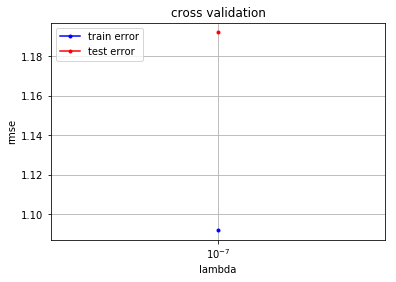

[1.091972799679619]
[1.19208258682283]


In [140]:
lambda_, acc_tr, acc_te = cross_validation(x_train_sep[2], y_train_sep[2], lambdas, poly_degree=3, norm="std", method="logistic", n_splits=2)

In [141]:
acc_tr

0.6853905289931697

In [142]:
acc_te

0.6871767025806637

In [135]:
b, c = min_max_normalization(x_train_sep[0], x_train_sep[0])

In [136]:
a = min_max_scaler.fit_transform(x_train_sep[0])

In [138]:
np.allclose(a, c)

True

In [9]:
from sklearn import preprocessing

In [10]:
scaler = preprocessing.StandardScaler().fit(x_train_sep[0])

x_train_scikit = scaler.transform(x_train_sep[0])
x_test_scikit = scaler.transform(x_test_sep[0])

In [11]:
x_train_me, x_test_me = standardize(x_train_sep[0], x_test_sep[0])

In [12]:
np.allclose(x_train_scikit, x_train_me)

True

In [21]:
np.allclose(x_test_scikit, x_test_me)

True